# Credit EDA Case Study

### Loading Libraries

In [2]:
# Importing all necessary libraries. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# to large dataframes can be seen in the output entirely

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

In [3]:
#Import the warnings.

import warnings
warnings.filterwarnings('ignore')

## Loading Application Data

In [4]:
# loading application data and inspecting the first five rows

app_data = pd.read_csv('application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Determining the dimensions of the dataset

app_data.shape

(307511, 122)

In [6]:
# checking detailed info of the dataframe

app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
# to get the statistical summary of the columns

app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Data cleaning

### Treating Null Values

In [8]:
# finding out the percentage of missing values in each column

app_data.isnull().sum()/len(app_data)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

##### observation:
- we see the there are quite a few columns with significant percentage of null values.
- At first glance, we find that there are many columns the has more than 47% null values.

##### Action:
- we can easily take a call and drop these columns right away since they won't be of any help

In [9]:
# dropping columns that have more than 47% null values

emptycol = app_data.isnull().sum()/len(app_data)
emptycol = list(emptycol[emptycol.values>=0.47].index)

app_data.drop(labels=emptycol, axis=1, inplace=True)

In [10]:
#checking shape of the dataframe after removing columns

app_data.shape

(307511, 73)

- number of columns dropped from 122 to 73.

In [11]:
# Checking the null percentage of the remaining columns again

app_data.isnull().sum()/len(app_data)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

##### Inferences: 
- We see that there is one column with 31.3% null values, another with 19.8% null values and at the end we see 6 columns with 13.5% null values.
- There are other few columns with less than 1% null values.

##### Action:
- Firstly, we will go through the columns description file to see which of the remaining columns are of significance and which are not.
- We will drop the columns which we reckon as worthless for our analysis.
- Then we will treat the missing values of the important columns.

In [12]:
# We are dropping a few more selected columns which we believe may not be important for our analysis.
unwanted_col = ['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_TYPE_SUITE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
        'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_2', 
        'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE']

# dropping the above columns and checking the shape

app_data = app_data.drop(unwanted_col, axis = 1)
app_data.shape

(307511, 33)

- we have 33 columns remaining.

In [13]:
# checking columns with null values once again

app_data.isnull().sum()/len(app_data)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PRO

- we see that OCCUPATION_TYPE column has a lot of null values but we cannot delete this columns neither can we impute it's null values since it is significant in number.

In [14]:
# list of columns that have null values

list(app_data.columns[app_data.isnull().sum()>0])

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']

 #### Missing values imputation in AMT_ANNUITY column

In [15]:
# describe the info of column AMT_ANNUITY

app_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

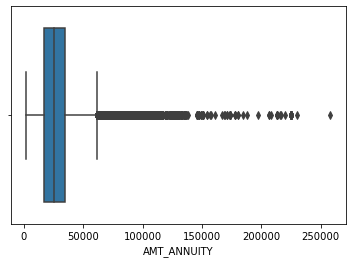

In [16]:
# Plotting the values of AMT_ANNUITY column using box plot to detect outliers

sns.boxplot(app_data['AMT_ANNUITY']);

##### Inference: 
From the Box Plot we can see that there are a lot of outliners and the difference between max and min is quite severe. So we are taking **median** value to replace those null values.

In [17]:
# Verifying the count of missing value for AMT_ANNUITY column

app_data.AMT_ANNUITY.isnull().sum()

12

In [18]:
# Filling missing values in column AMT_ANNUITY with median

fillMissingVal = app_data['AMT_ANNUITY'].median()
app_data['AMT_ANNUITY'].fillna(value=fillMissingVal, inplace =True)

In [19]:
#checking the count of missing value for AMT_ANNUITY column 

app_data.AMT_ANNUITY.isnull().sum()

0

 #### Missing values imputation in  AMT_GOODS_PRICE column.

In [20]:
# describe the info of column AMT_GOODS_PRICE

app_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

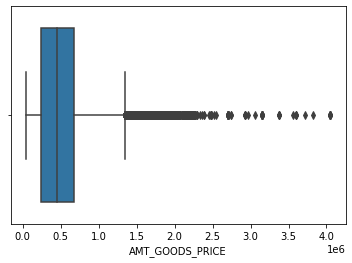

In [21]:
# Plotting the values of AMT_GOODS_PRICE column using box plot to detect outliers

sns.boxplot(app_data['AMT_GOODS_PRICE']);

##### Inference:
Here also we see a large amount of outliers. Hence, we will impute the null values with **median**

In [22]:
# Verifying the count of missing value for AMT_ANNUITY column

app_data.AMT_GOODS_PRICE.isnull().sum()

278

In [23]:
# Filling missing values in column AMT_ANNUITY with median

fillMissingVal=app_data['AMT_GOODS_PRICE'].median()
app_data['AMT_GOODS_PRICE'].fillna(value = fillMissingVal, inplace =True)

In [24]:
# checking the count of missing value for AMT_ANNUITY column

app_data.AMT_ANNUITY.isnull().sum()

0

 #### Missing values imputation in  CNT_FAM_MEMBERS column.

In [25]:
# describe the info of column CNT_FAM_MEMBERS

app_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

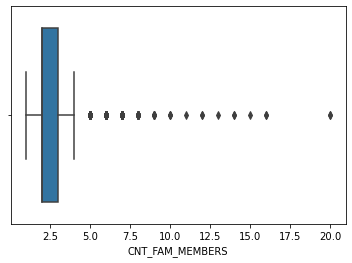

In [26]:
# Plotting the values of CNT_FAM_MEMBERS  column using box plot to detect outliers

sns.boxplot(app_data['CNT_FAM_MEMBERS']);

In [27]:
# Verifying the count of missing value for CNT_FAM_MEMBERS column

app_data.CNT_FAM_MEMBERS.isnull().sum()

2

In [28]:
# Filling missing values with median

fillMissingVal=app_data['CNT_FAM_MEMBERS'].median()
app_data['CNT_FAM_MEMBERS'].fillna(value = fillMissingVal, inplace =True)

In [29]:
#checking the count of missing value for CNT_FAM_MEMBERS column
app_data.CNT_FAM_MEMBERS.isnull().sum()

0


- There are some columns where the values are mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

#### Analysing CODE_GENDER column

In [30]:
# Describing the Gender column to check the number of females and males

app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


Since, Female is having the majority and only 4 rows are having XNA values, we can update those columns with Gender 'F' as there will be no impact on the dataset


In [31]:
# Replacing 'XNA' with 'F' in the column 'CODE_GENDER'.

app_data.loc[app_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

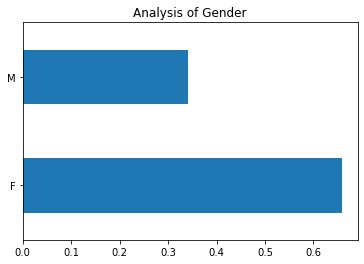

In [32]:
# plot the bar graph of CODE_GENDER

app_data['CODE_GENDER'].value_counts(normalize=True).plot.barh(title='Analysis of Gender');

- more than 65% of applicants are Females

#### Analysing ORGANIZATION_TYPE column

In [33]:
# checking null value in ORGANIZATION_TYPE column

app_data['ORGANIZATION_TYPE'].isnull().sum()

0

In [34]:
app_data['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [35]:
# checking count of each Type of organization where client works

app_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

##### Inference:
There are 55374 rows with XNA value(i.e. Null) which is 18% of the total count. We cannot impute these null values as they are significant in number and there are 58 unique catergories in this column to choose from and on top of that the mode value 'Business Entity Type 3' itself is not very prevalent. So, we will leave them as it is.

### Treating Outliers

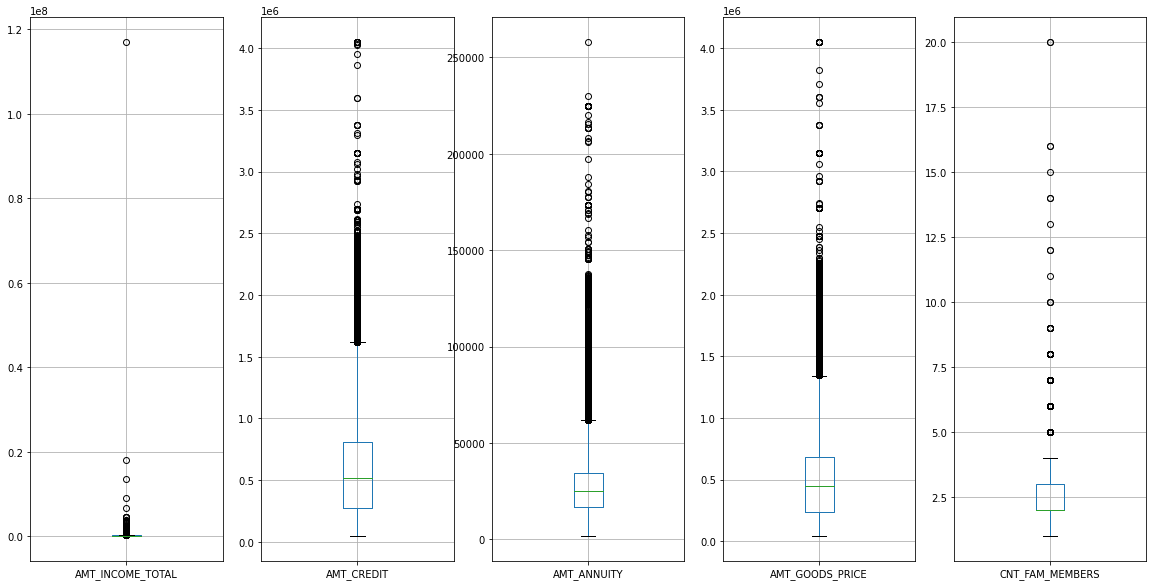

In [36]:
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']

plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    app_data.boxplot(column = col)
plt.show()

##### Inference:
- We observe that AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE and CNT_FAM_MEMBERS variables have huge outliers as we can see the spike at 100 percentile. So we will use 1.5 IQR rule to remove outliers

In [37]:
# removing outliers using 1.5 IQR method

for col in cols: 
    q1 = app_data[col].quantile(0.25)
    q3 = app_data[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    app_data = app_data.loc[(app_data[col] > range_low) & (app_data[col] < range_high)]

In [38]:
# we will check the dimension of the data after removing the outliers

app_data.shape

(272931, 33)

In [39]:
# percentage of data remaining after removing the outliers

(272931/307511)*100

88.7548738093922

- We have 88.75% of the data remaining with us after we have removed the outliers.

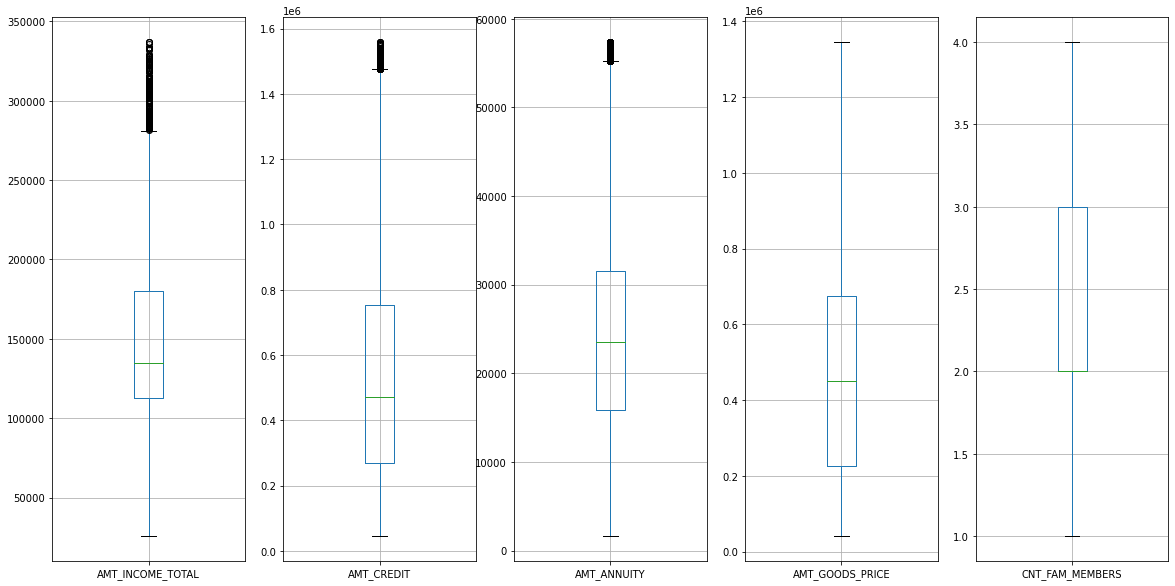

In [40]:
# we will again draw the box plots to recheck if there's any outliers left

plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    app_data.boxplot(column = col)
plt.show()

##### Inference:

- We see that AMT_INCOME_TOTAL, AMT_CREDIT AND AMT_ANNUITY columns have some outliers left but we decide to keep them as it is since they are not huge in number.

### Binning numerical variables for analysis

In [41]:
# Creating bins for income amount

bin1 = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,10000000000]
slot1 = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000 and above']

app_data['AMT_INCOME_RANGE'] = pd.cut(app_data['AMT_INCOME_TOTAL'], bins=bin1, labels=slot1)

In [42]:
# Creating bins for Credit amount

bin2 = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000,1000000000]
slot2 = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000-1000000','1000000 and above']

app_data['AMT_CREDIT_RANGE'] = pd.cut(app_data['AMT_CREDIT'],bins=bin2,labels=slot2)

In [43]:
# we will check if AMT_INCOME_RANGE and AMT_CREDIT_RANGE columns have been added

app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'AMT_INCOME_RANGE',
       'AMT_CREDIT_RANGE'],
      dtype='object')

- we see that AMT_INCOME_RANGE and AMT_CREDIT_RANGE columns have been added at the end.

### Dividing the data into 2 dataframe 

In [44]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0 = app_data.loc[app_data["TARGET"]==0]
target1 = app_data.loc[app_data["TARGET"]==1]

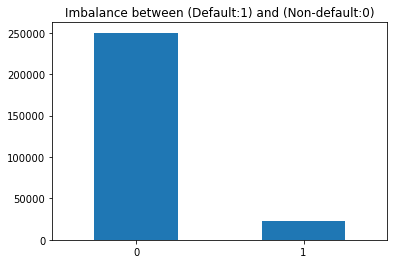

In [45]:
# graphical analysis of the share

app_data['TARGET'].value_counts().plot(kind='bar')
plt.title('Imbalance between (Default:1) and (Non-default:0)')
plt.xticks(rotation = 0)
plt.show()

In [46]:
# Calculating Imbalance ratio

imbalance_ratio = round(len(target0)/len(target1),2)
imbalance_ratio

10.98

##### Inference:
The Imbalance ratio is 10.98 (i.e. number of Non-defaulters is 10.98 times of the number of Defaulters)

## Univariate analysis for categories

In [47]:
#reusable ploting function

def countplotfunc(df,col,title,hue = None):
    
    sns.set_style('whitegrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 5 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.yscale('log')
    plt.title(title,fontsize=20)
    ax = sns.countplot(data=df, x=col, hue=hue, palette='PuBuGn') 
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    plt.show()

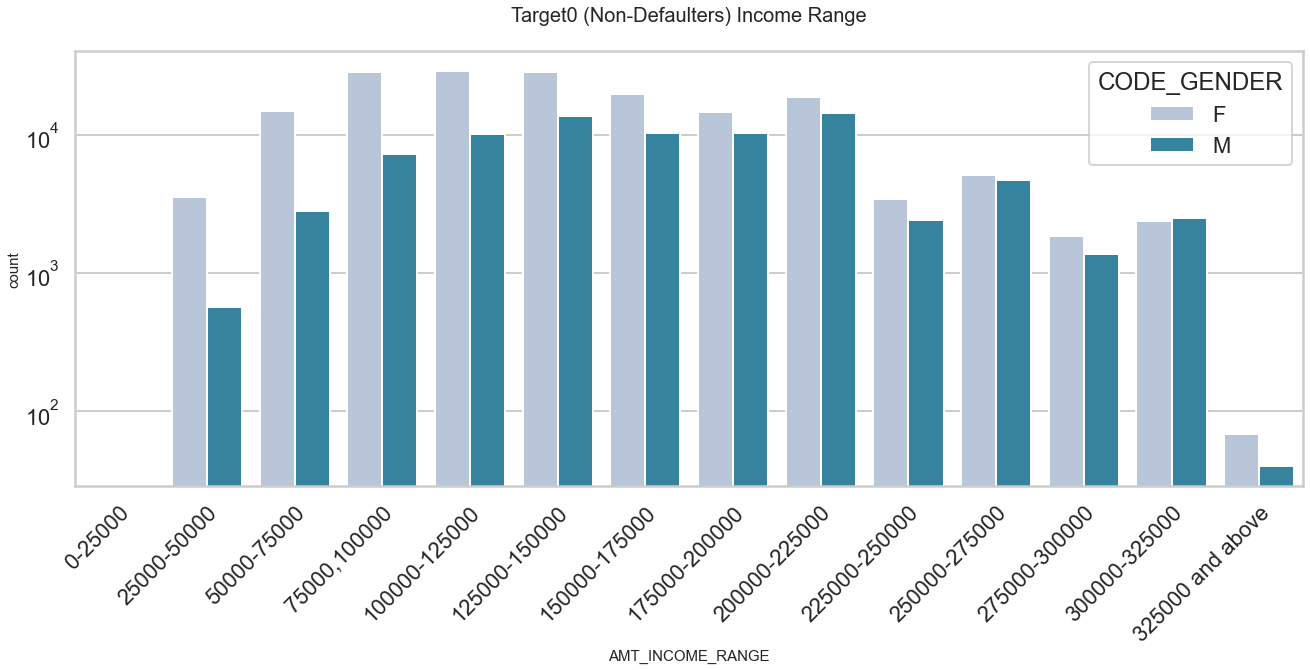

In [48]:
# Plotting for income range for target0 

countplotfunc(target0, col='AMT_INCOME_RANGE', title='Target0 (Non-Defaulters) Income Range', hue='CODE_GENDER')

##### Inference:

Points to be concluded from the above graph for target=0(Non-Defaulters):-

- We see an increase in the number of Non-defaulters in initial income bracket and then a steady decrease. Then the graph suddenly dips at (325000 and above) income bracket.
- We can conclude that people with higher income are less likely to be Defaulters.
- There are more Females than males in almost every income bracket except for 300000-325000 where male count is a little bit higher 
- This graph states that overall there are more Female Non-defaulters than Male Non-defaulters across the income range.

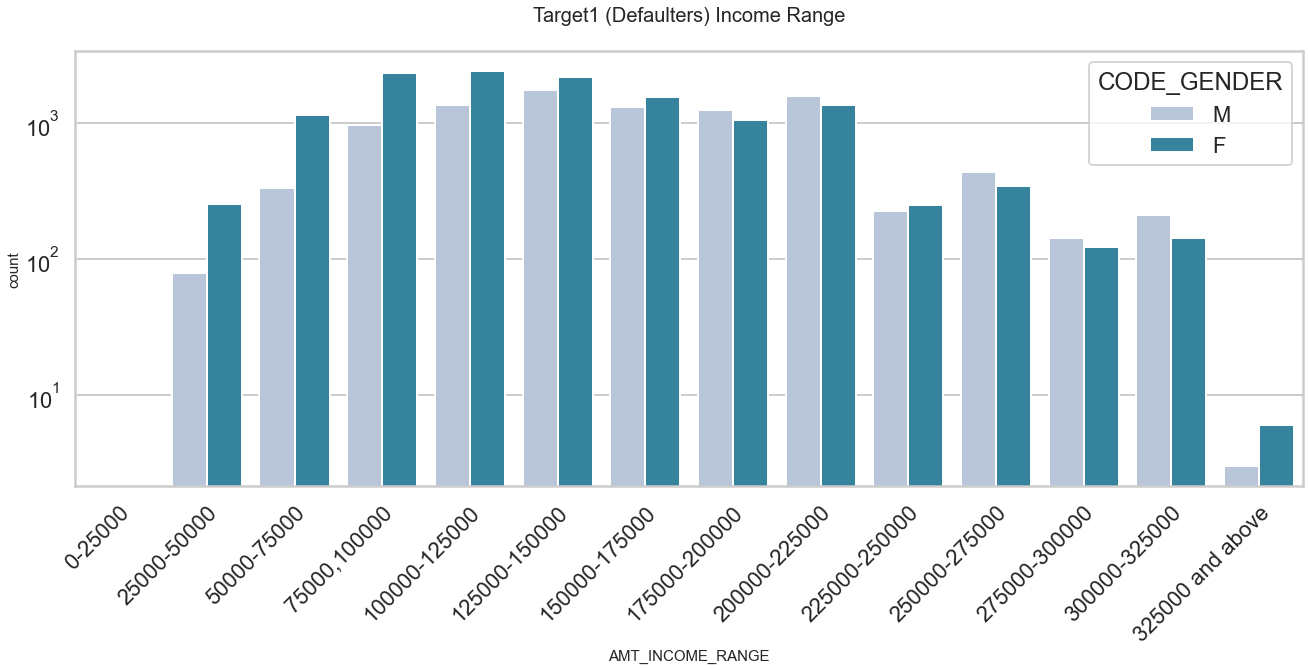

In [49]:
# Plotting for income range for target1

countplotfunc(target1, col='AMT_INCOME_RANGE', title='Target1 (Defaulters) Income Range', hue='CODE_GENDER')

##### Inference:

Points to be concluded from the above graph for Target=1 (Defaulters):-

- The number of Defaulter also follow the same trend as number of Non-defaulters across the income range i.e. first increases and then decreases.
- Here, we see that there are more female defaulters than male defaulters in the lower income range but there are more male defaulters than female defaulters on the higher income range. 

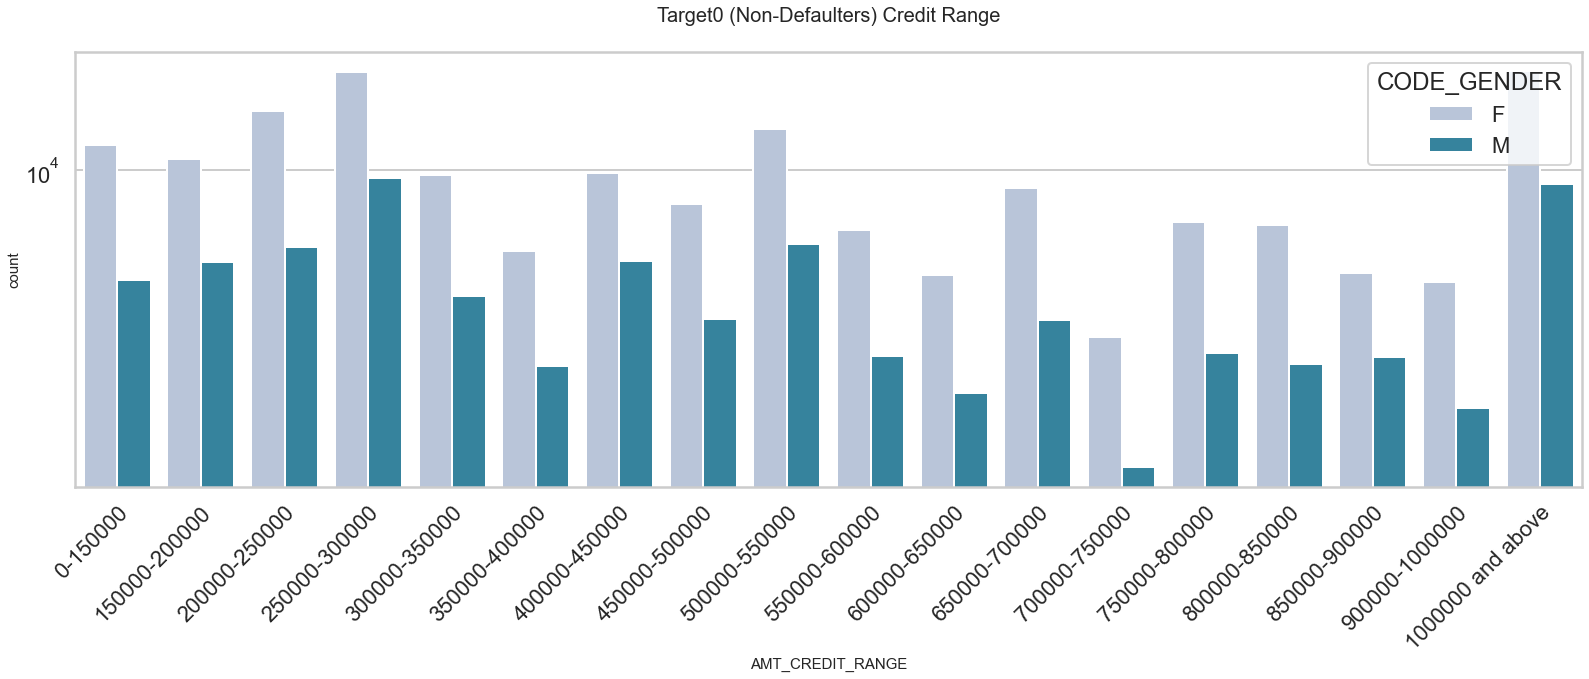

In [50]:
# Plotting for credit range for target0 

countplotfunc(target0, col='AMT_CREDIT_RANGE', title='Target0 (Non-Defaulters) Credit Range', hue='CODE_GENDER')

##### Inference:

- We see that there are more females than males in each credit range.
- The number of Non-defaulted credits is higher in the lower credit range upto 3 lakhs and it spikes back up after 10 lakhs.

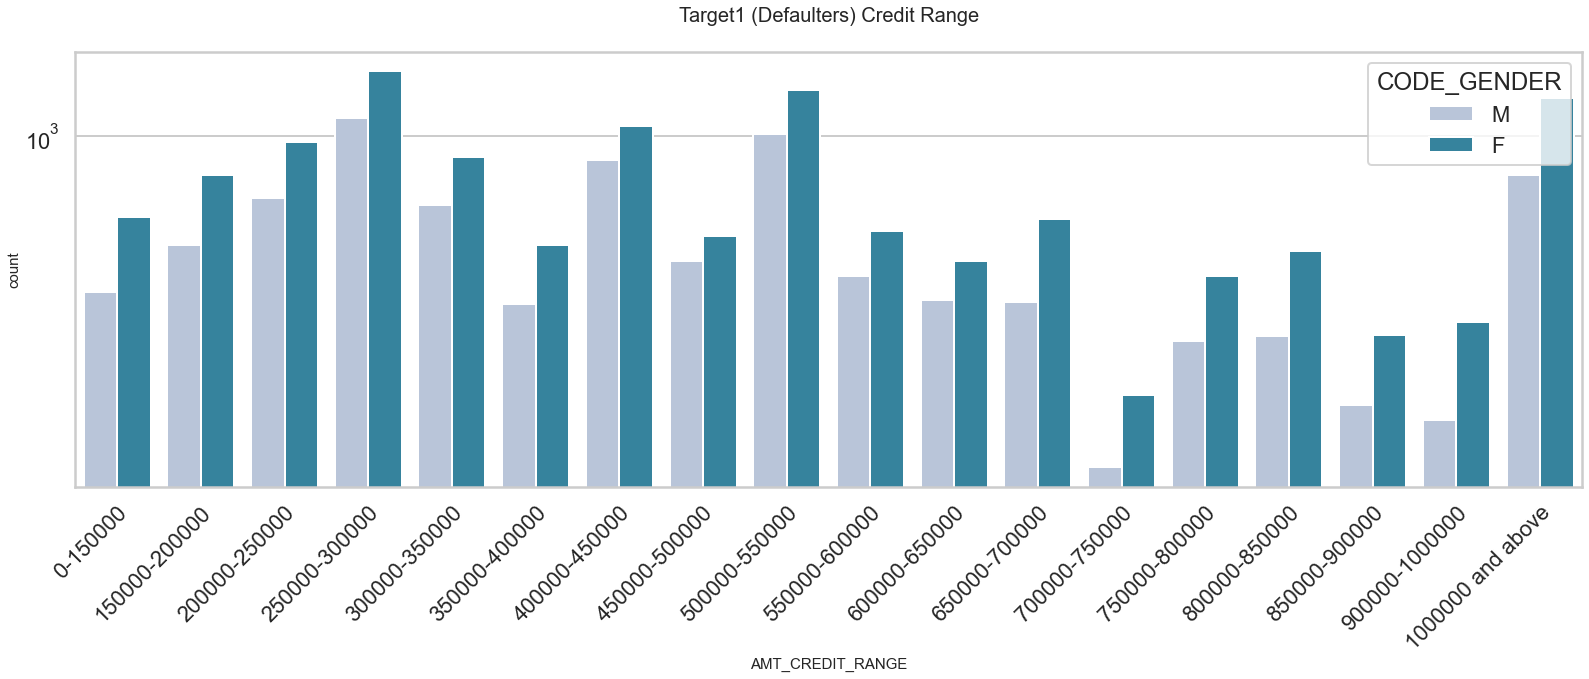

In [51]:
# Plotting for credit range for target1

countplotfunc(target1, col='AMT_CREDIT_RANGE', title='Target1 (Defaulters) Credit Range', hue='CODE_GENDER')

##### Inference:

- We see that females are more in number in each Credit Range among Defaulters as well.
- We see three spikes in the graph 2.5-3.0 lakhs, 5-5.5 lakhs and 10 lakhs and above Credit Range.
- The number of Defaulters is higher in lower Credit Range and spikes back up after credit of 10 lakhs. 

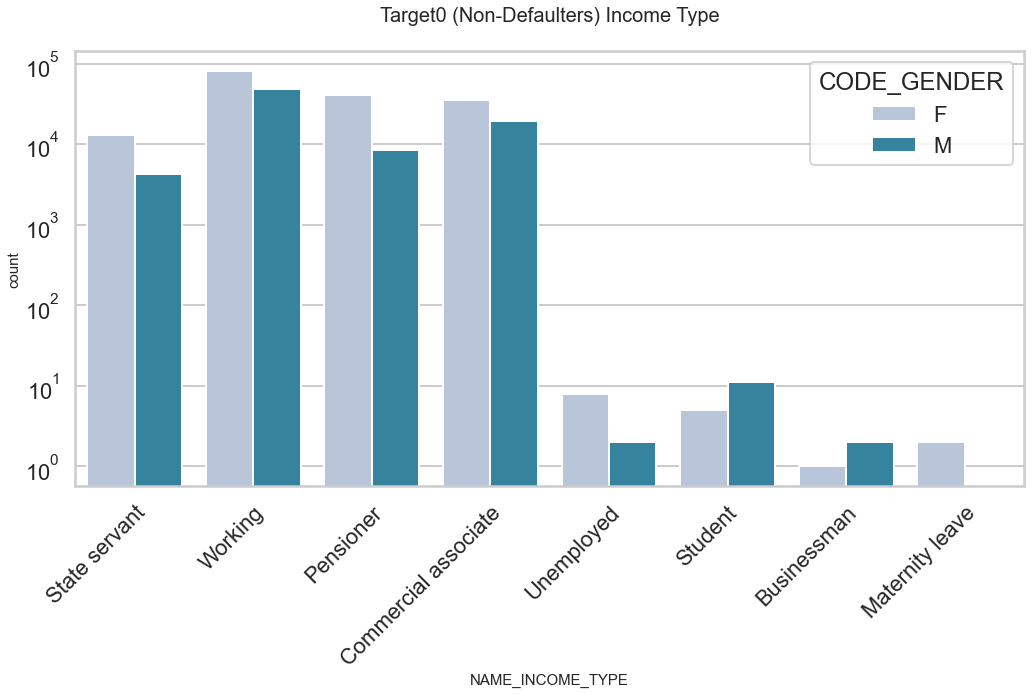

In [52]:
# Plotting for Income type for target0 (i.e. Non-defaulters)

countplotfunc(target0, col='NAME_INCOME_TYPE', title='Target0 (Non-Defaulters) Income Type', hue='CODE_GENDER')

##### Inference:

Points to be concluded from the above graph for Target=0 (Non-Defaulters):-

- Female are more in number than males in almost all the income type except student and businessman.
- For Maternity leave, the graph shows only females which is expected.
- High number for income type state servant, working , commercial associate and pensioner.
- Low number for income type student, unemployed, businessman and maternity leave.

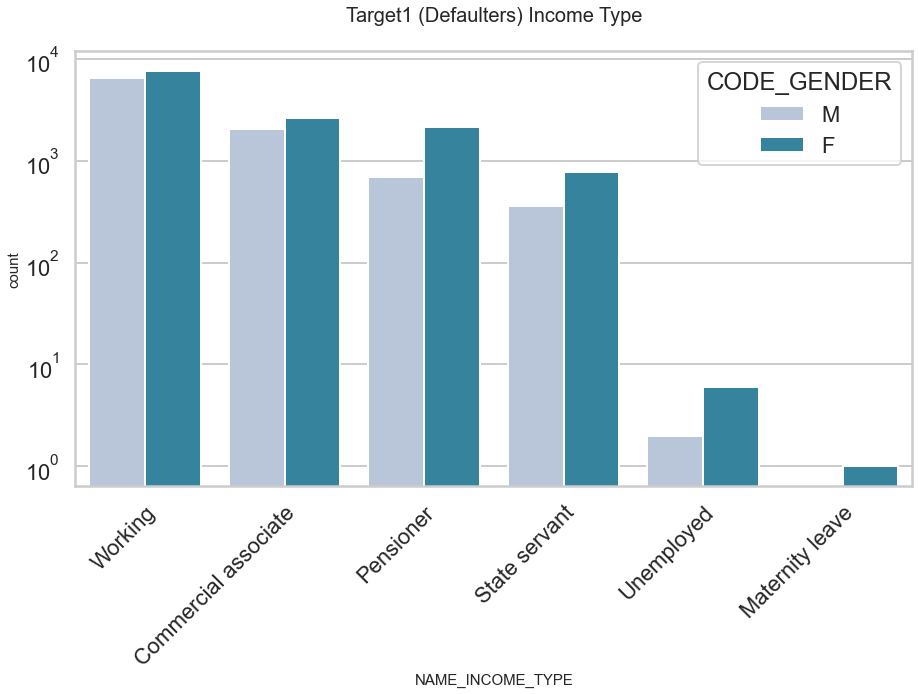

In [53]:
# Plotting for Income Type for target1

countplotfunc(target1, col='NAME_INCOME_TYPE', title='Target1 (Defaulters) Income Type', hue='CODE_GENDER')

##### Inference:

Points to be concluded from the above graph for Target=1 (Defaulters):-

- Females are more in number than males in all the income type.
- High number of Defaulters for income type working , commercial associate , pensioner and state servant.
- Low number of Defaulters for income type unemployed and maternity leave.
- One very important thing we notice if we compare this graph(Defaulters) with that of previous one(Non-Defaulters), is that there are no 'Student' or 'Businessman' among the Defaulters.

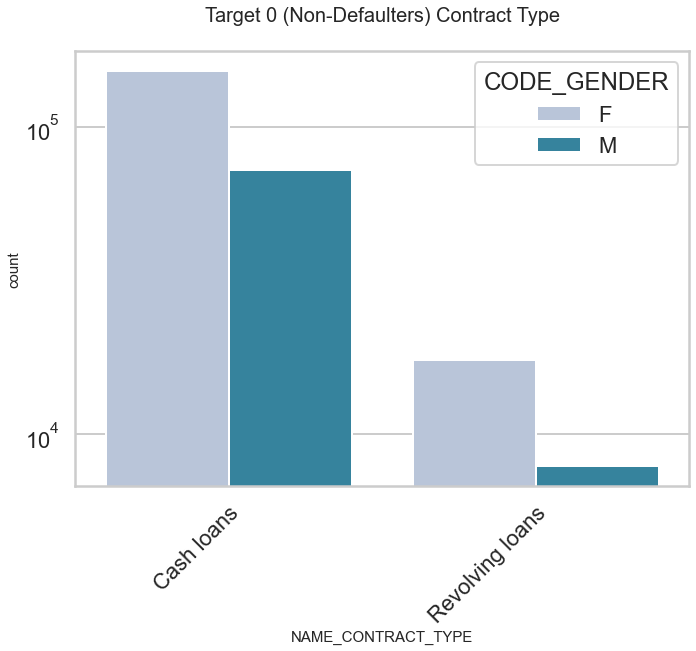

In [54]:
# Plotting for NAME_CONTRACT_TYPE for target0

countplotfunc(target0, col='NAME_CONTRACT_TYPE', title='Target 0 (Non-Defaulters) Contract Type', hue='CODE_GENDER')

##### Inference:

Points to be concluded from the above graph for Target=0 (Non-Defaulters):-

- Cash Loan contracts have a higher number of credit than revolving loan contracts.
- Count of female is more.

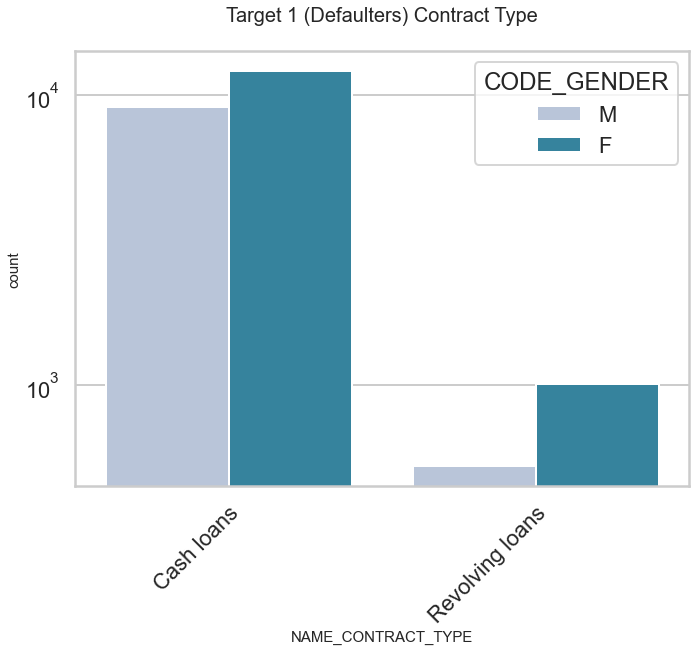

In [55]:
# Plotting for NAME_CONTRACT_TYPE for target1

countplotfunc(target1, col='NAME_CONTRACT_TYPE', title='Target 1 (Defaulters) Contract Type', hue='CODE_GENDER')

##### Inference:

Points to be concluded from the above graph for Target = 1 (Defaulters):-

1. Cash Loan contracts have a higher number of Defaulters than revolving loan contracts
2. Females are more in number.

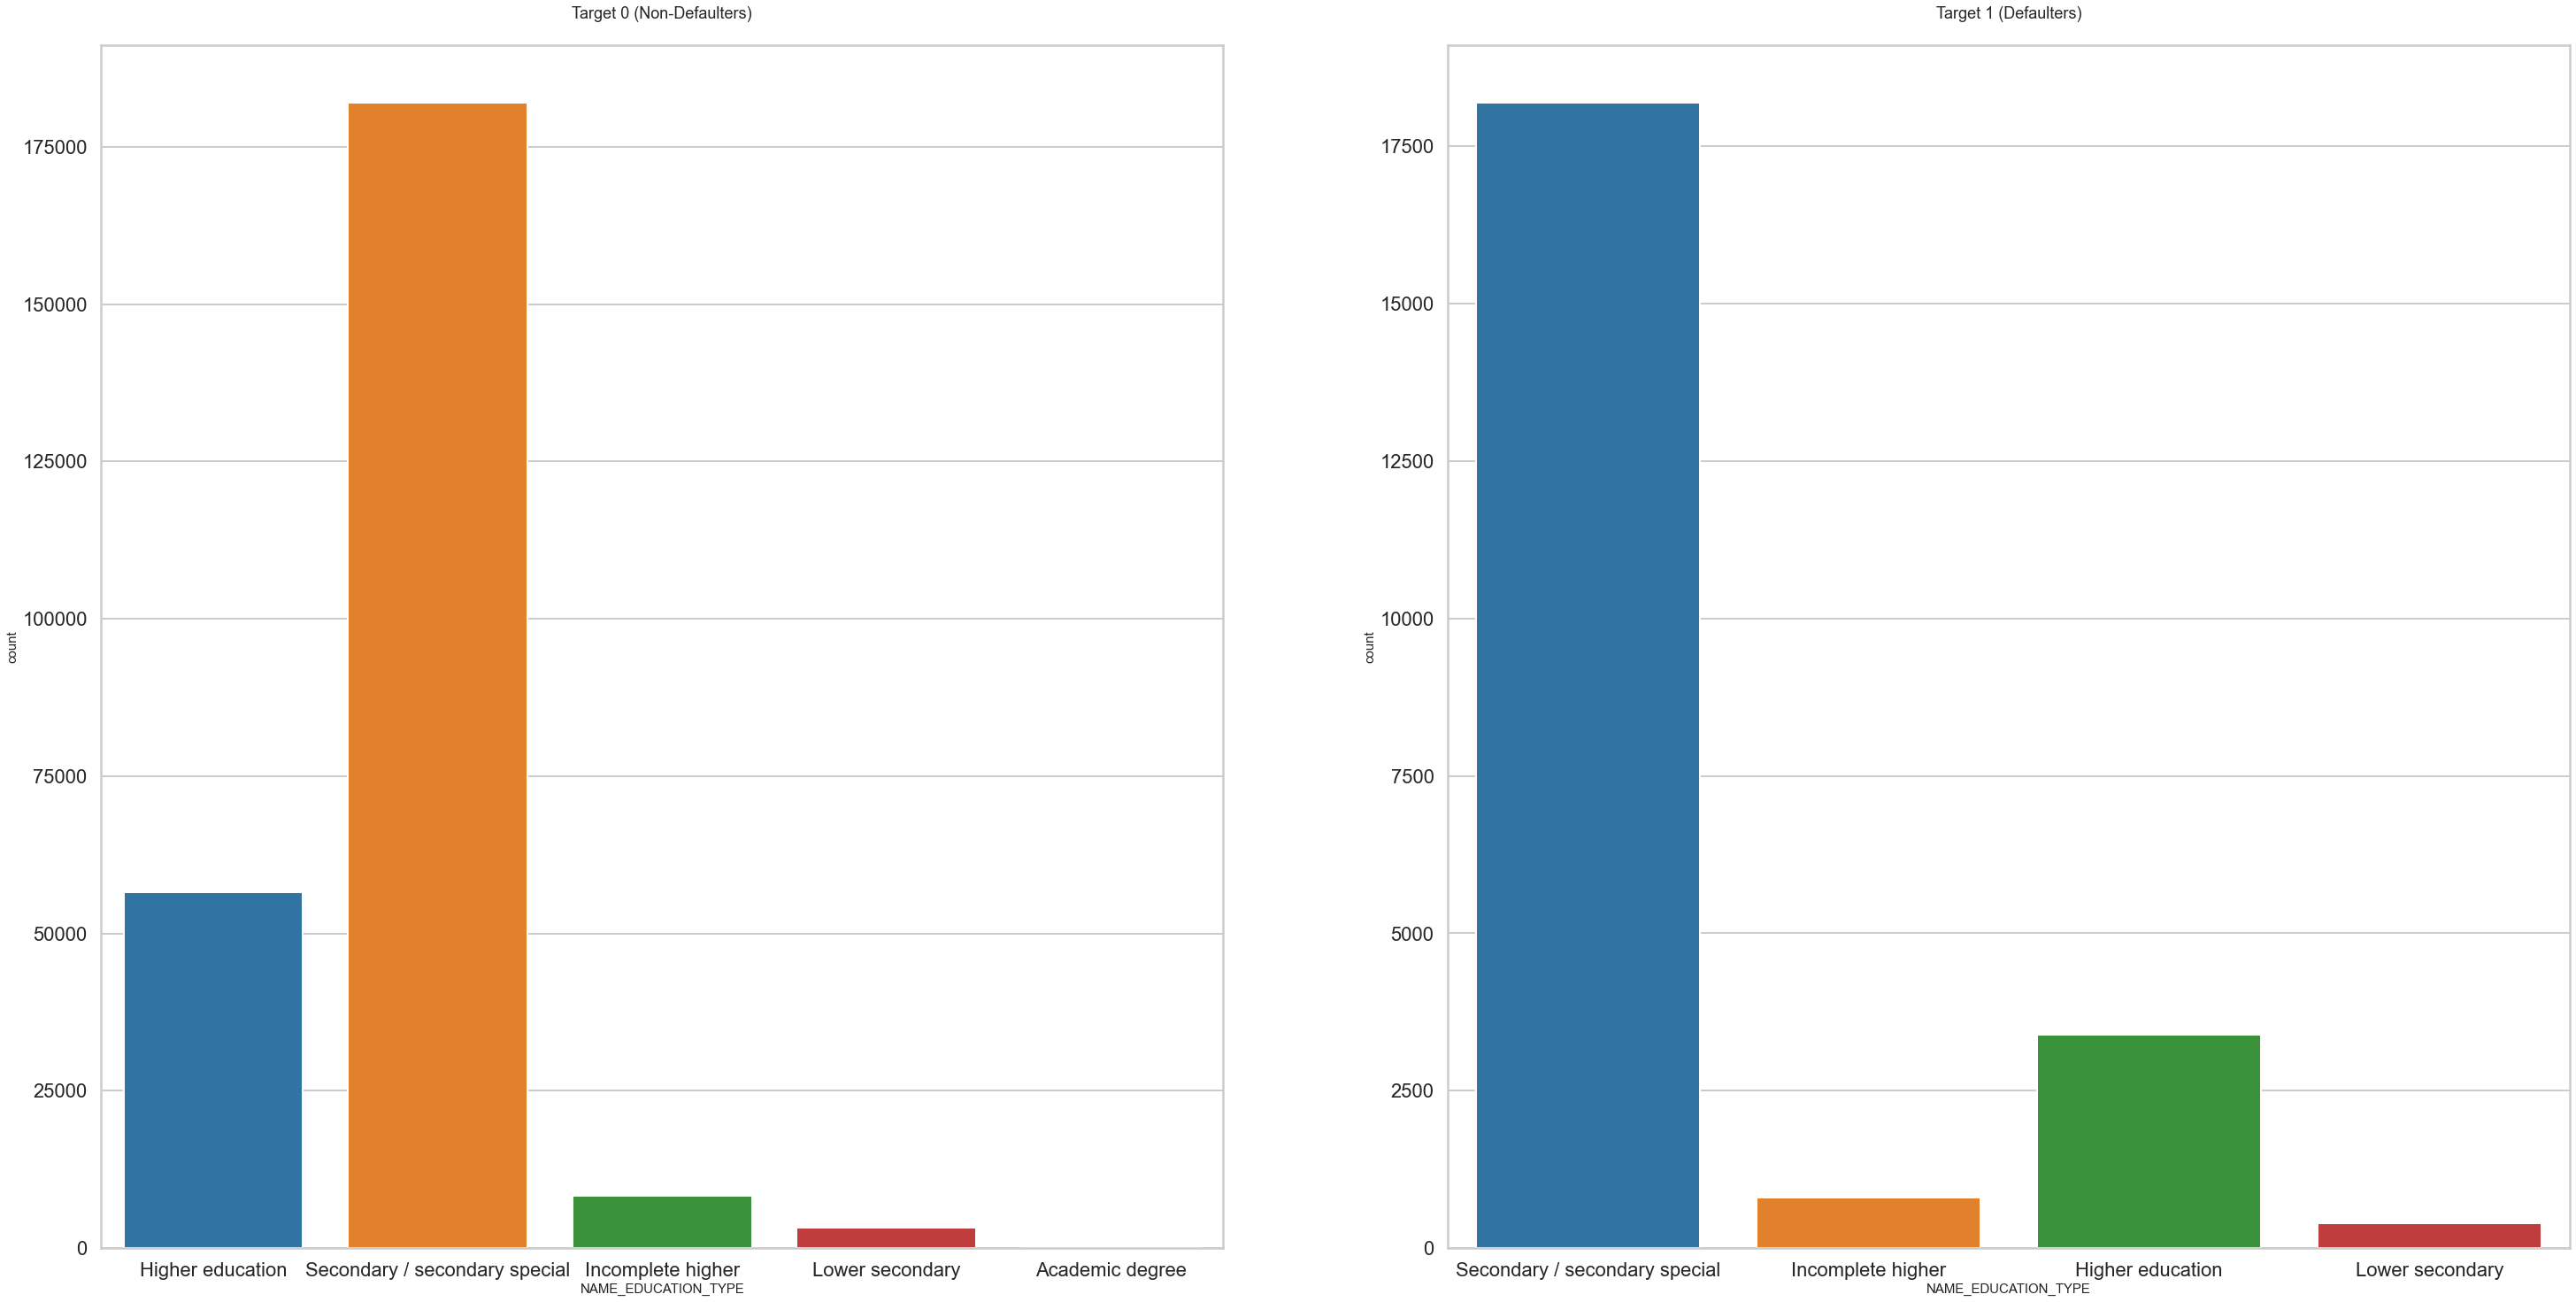

In [56]:
# Plotting for NAME_EDUCATION_TYPE for target0 and target1

fig, ax = plt.subplots(1,2,figsize=(50,25))

sns.countplot(target0['NAME_EDUCATION_TYPE'], ax=ax[0]).set_title('Target 0 (Non-Defaulters)')
sns.countplot(target1['NAME_EDUCATION_TYPE'], ax=ax[1]).set_title('Target 1 (Defaulters)')

fig.show()

##### Inference:

Points to be concluded from the above graph:-

- We can see that people with secondary education are highest in number among both defaulters and non-defaulters. This could be because a high majority of population is secondary educated.   

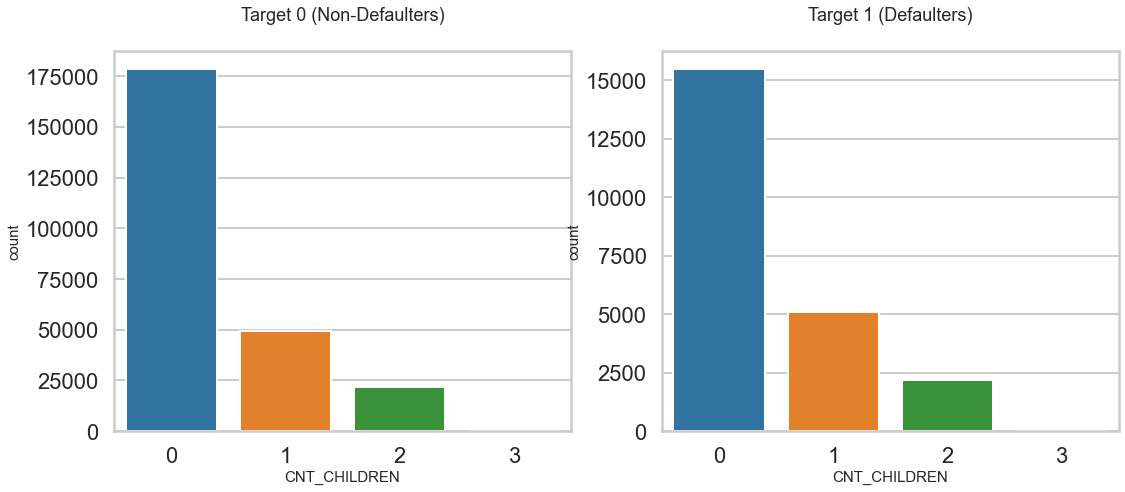

In [57]:
# Plotting for CNT_CHILDREN for target0 and target1

fig, ax = plt.subplots(1,2,figsize=(18,7))

sns.countplot(target0['CNT_CHILDREN'], ax=ax[0]).set_title('Target 0 (Non-Defaulters)')
sns.countplot(target1['CNT_CHILDREN'], ax=ax[1]).set_title('Target 1 (Defaulters)')

fig.show()

##### Inference:

Points to be concluded from the above graph:-

- We can see that lesser number of children maximizes the chances of both being a defaulter as well as a non-defaulter. So we cannot conclude anything significant from this exploration.

## Univariate Analysis for Continuous Variables

In [58]:
# Function for box plot

def Boxplotfunc(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('notebook')
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.titlepad'] = 10
    
    plt.title(title)
    plt.xscale('log')
    sns.boxplot(data =data, x=col,orient='v',color="brown")
    plt.show()

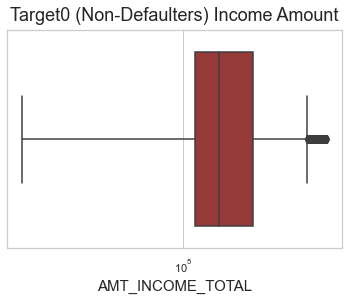

In [59]:
# Distribution of income amount for Target0
Boxplotfunc(data=target0, col='AMT_INCOME_TOTAL', title='Target0 (Non-Defaulters) Income Amount')

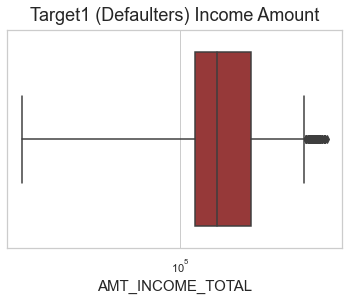

In [60]:
# Distribution of income amount for Target1
Boxplotfunc(data=target1, col='AMT_INCOME_TOTAL', title='Target1 (Defaulters) Income Amount')

##### Inference:

Points to be concluded from the above 2 graph:-

- Some outliners are present in both.
- There is no observable difference in income of defaulters and non-defaulters.

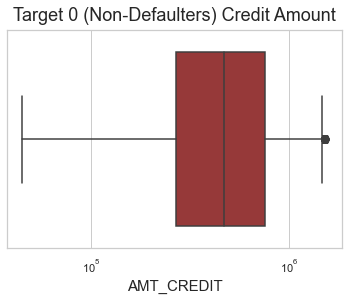

In [61]:
# Disrtibution of credit amount for Target 0
Boxplotfunc(data=target0, col='AMT_CREDIT', title='Target 0 (Non-Defaulters) Credit Amount')

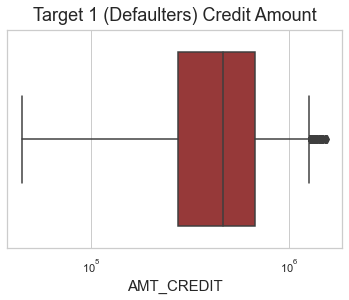

In [62]:
# Disrtibution of credit amount for Target 1
Boxplotfunc(data=target1, col='AMT_CREDIT', title='Target 1 (Defaulters) Credit Amount')

##### Inference:

Points to be concluded from the above 2 graph:-

- There are more outliers among Defaulters as compared to non-defaulters.
- 3rd quartile is narrow for both target 1.
- Most of the clients have credit amount in the 1st quartile.

## Bivariate Analysis

### Analysing correlation for numerical columns for both Target 0 and Target1

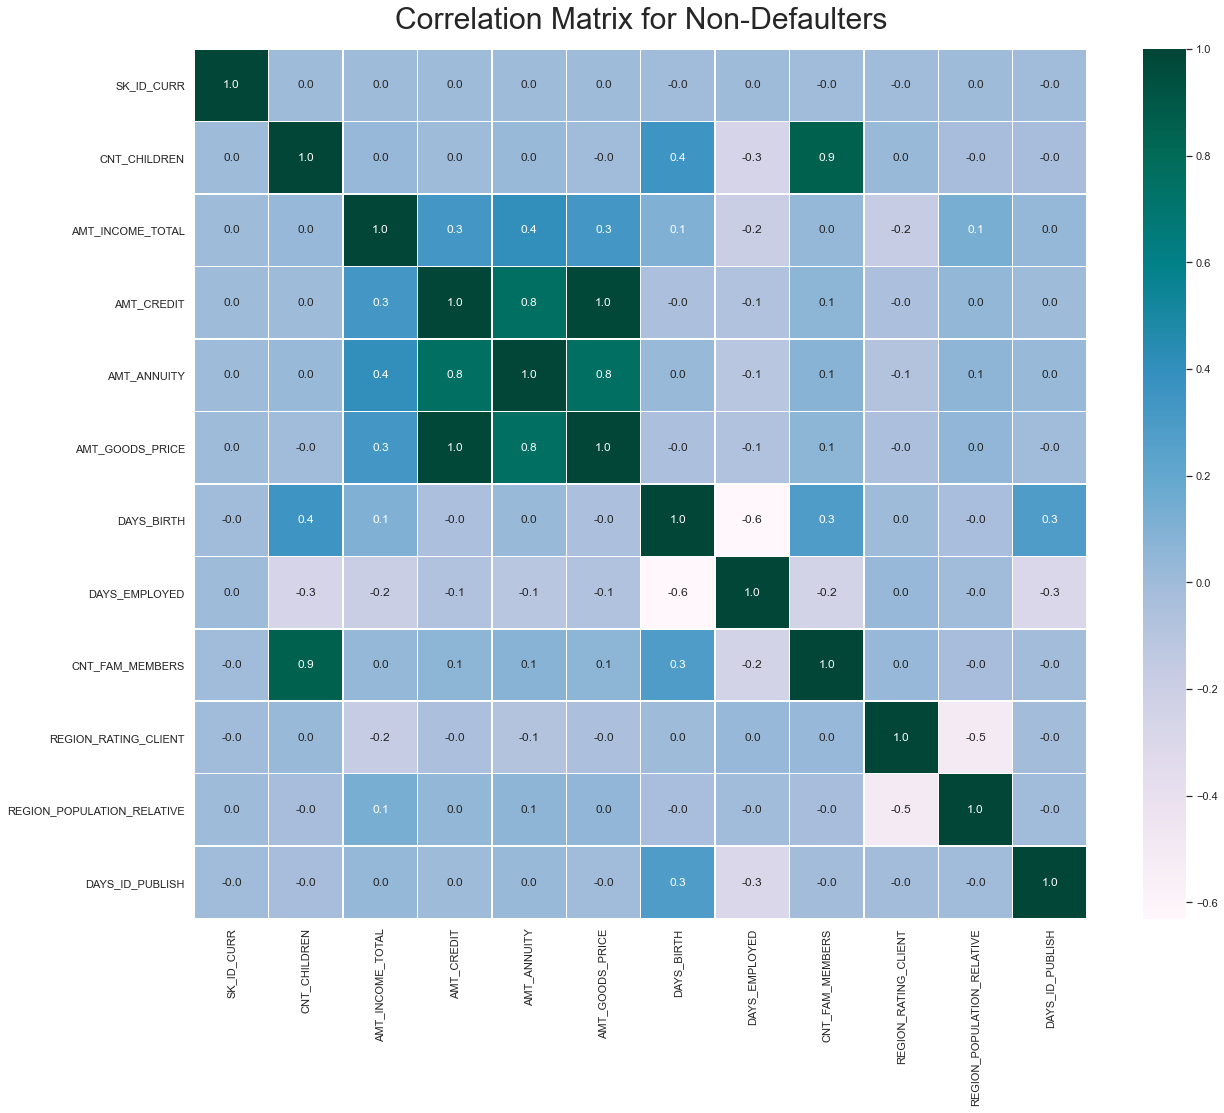

In [63]:
# Plotting Correlation matrix for Target 0 application data

d=target0[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]

plt.figure(figsize=(20,16))
sns.heatmap(d.corr(), fmt='.1f', cmap="PuBuGn",linewidths=.5, annot=True)
plt.title("Correlation Matrix for Non-Defaulters",fontsize=30, pad=20 )
plt.show()

##### Inference:

These columns have high correlation values for Target 0:-

- AMT_GOODS_PRICE and AMT_CREDIT
- AMT_ANNUITY and AMT_CREDIT
- AMT_ANNUITY and AMT_GOODS_PRICE
- CNT_FAM_MEMBERS and CNT_CHILDREN
- AMT_ANNUITY and AMT_INCOME_TOTAL
- AMT_INCOME_TOTAL and AMT_GOODS_PRICE

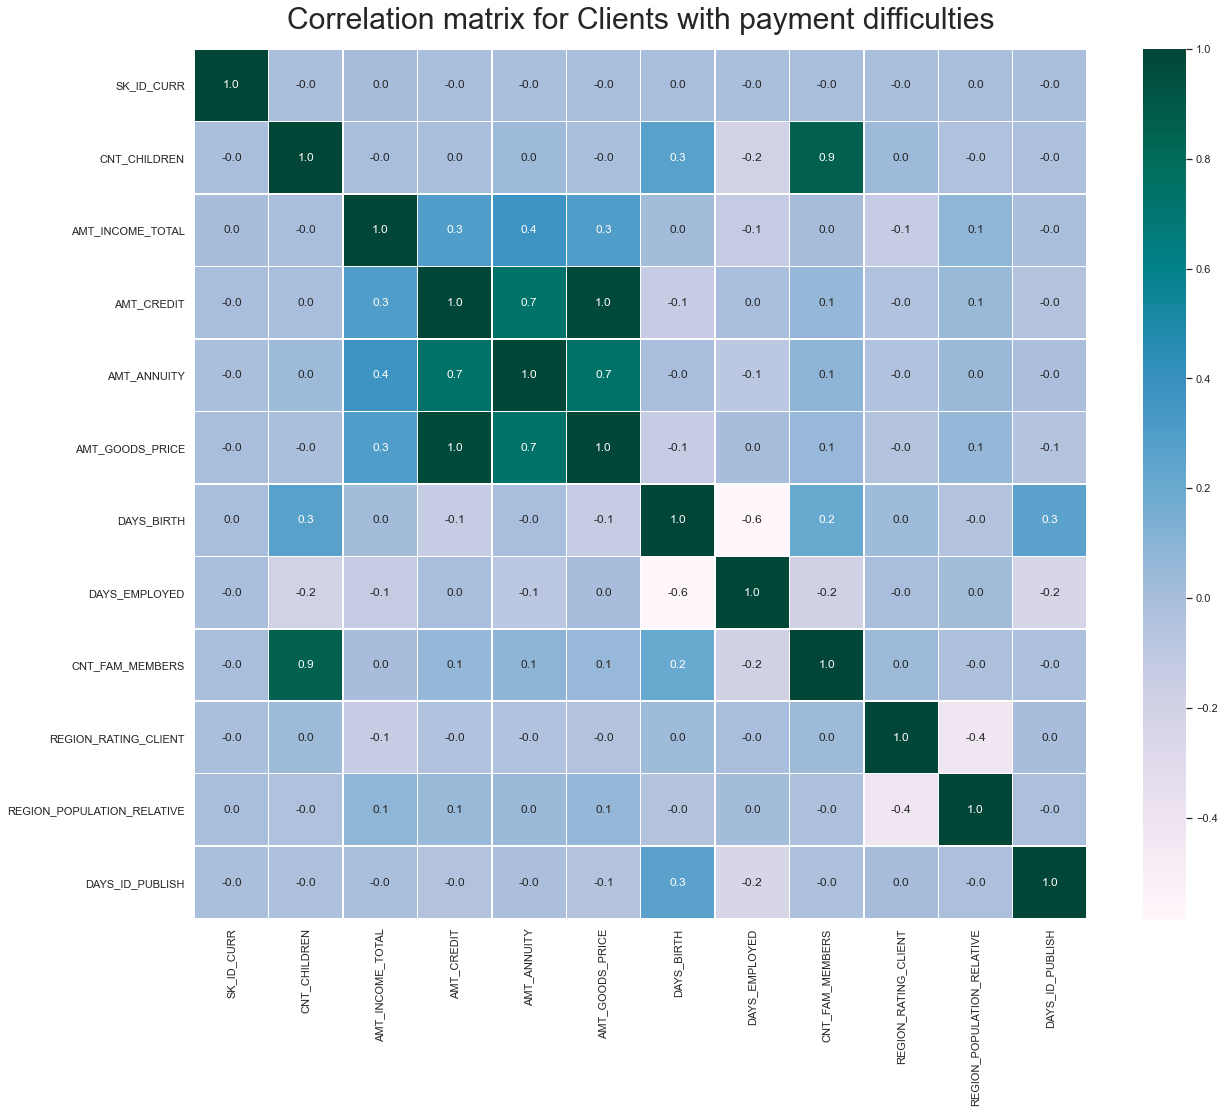

In [64]:
# Plotting Correlation matrix for Target 1 application data

d=target1[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
f, ax = plt.subplots(figsize=(20,16))
sns.heatmap(d.corr(), annot=True, fmt='.1f',cmap="PuBuGn", linewidths=.5, ax=ax)
plt.title("Correlation matrix for Clients with payment difficulties",fontsize=30, pad=20 )
plt.show()

##### Inference:

Both for Target 0 and Target 1 these columns have high correlation values:-

- AMT_GOODS_PRICE and AMT_CREDIT
- AMT_ANNUITY and AMT_CREDIT
- AMT_ANNUITY and AMT_GOODS_PRICE
- CNT_FAM_MEMBER and CNT_CHILDREN
- AMT_ANNUITY and AMT_INCOME_TOTAL
- AMT_INCOME_TOTAL and AMT_GOODS_PRICE

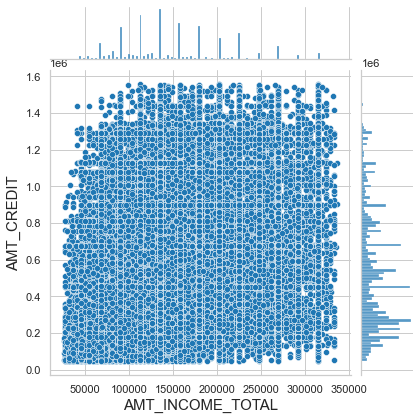

In [65]:
# ploting income vs credit for Target 0
sns.jointplot('AMT_INCOME_TOTAL', 'AMT_CREDIT', target0);

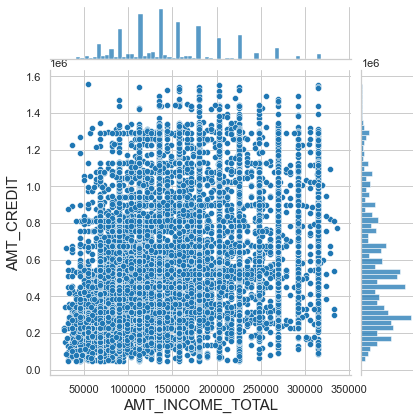

In [66]:
# ploting income vs credit for Target 1
sns.jointplot('AMT_INCOME_TOTAL', 'AMT_CREDIT', target1);

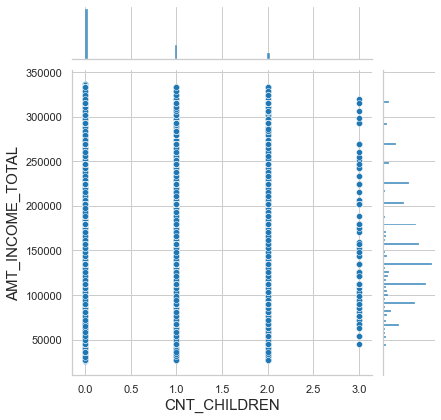

In [67]:
# ploting AMT_INCOME_TOTAL vs CNT_CHILDREN for Target 0
sns.jointplot('CNT_CHILDREN', 'AMT_INCOME_TOTAL', target0);

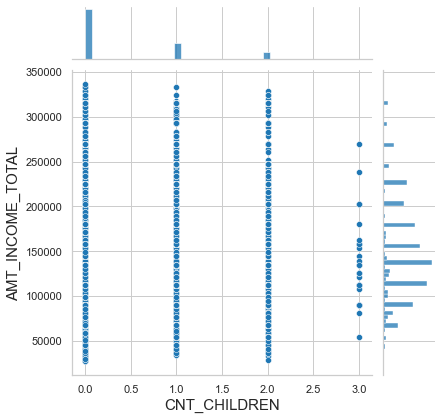

In [68]:
# ploting AMT_INCOME_TOTAL vs CNT_CHILDREN for Target 1
sns.jointplot('CNT_CHILDREN', 'AMT_INCOME_TOTAL', target1);

### Analysing Credit Amount wrt. Education Status

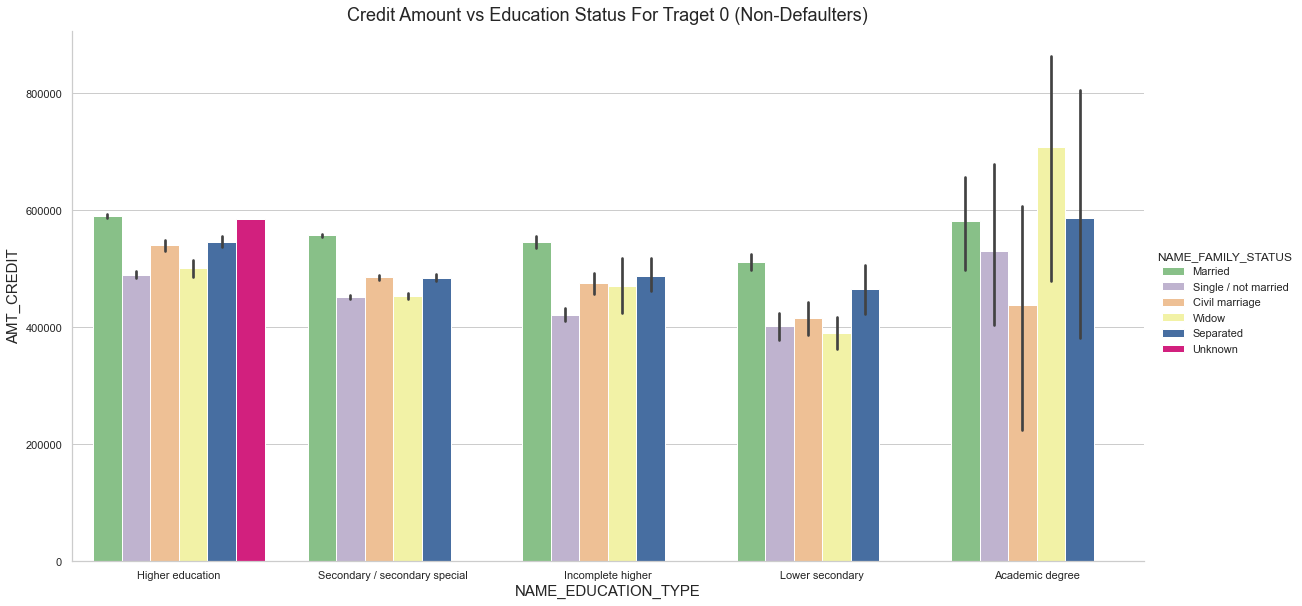

In [69]:
# ploting NAME_EDUCATION_TYPE vs AMT_CREDIT for each family status for Target 0

sns.catplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=8,aspect=2, kind="bar", palette="Accent")
plt.title('Credit Amount vs Education Status For Traget 0 (Non-Defaulters)');

##### Inference:

Points to be concluded from the above graph for target = 0 (Non-Defaulters):-

- Customers holding academic degree have greater credit amount, Civil marriage segment being the highest among them.
- Lower educated customers tends to have lower credit amount, Widows being the lowest among them
- Married customers in almost all education segment except lower secondary and academic degrees have a higher credit amount.

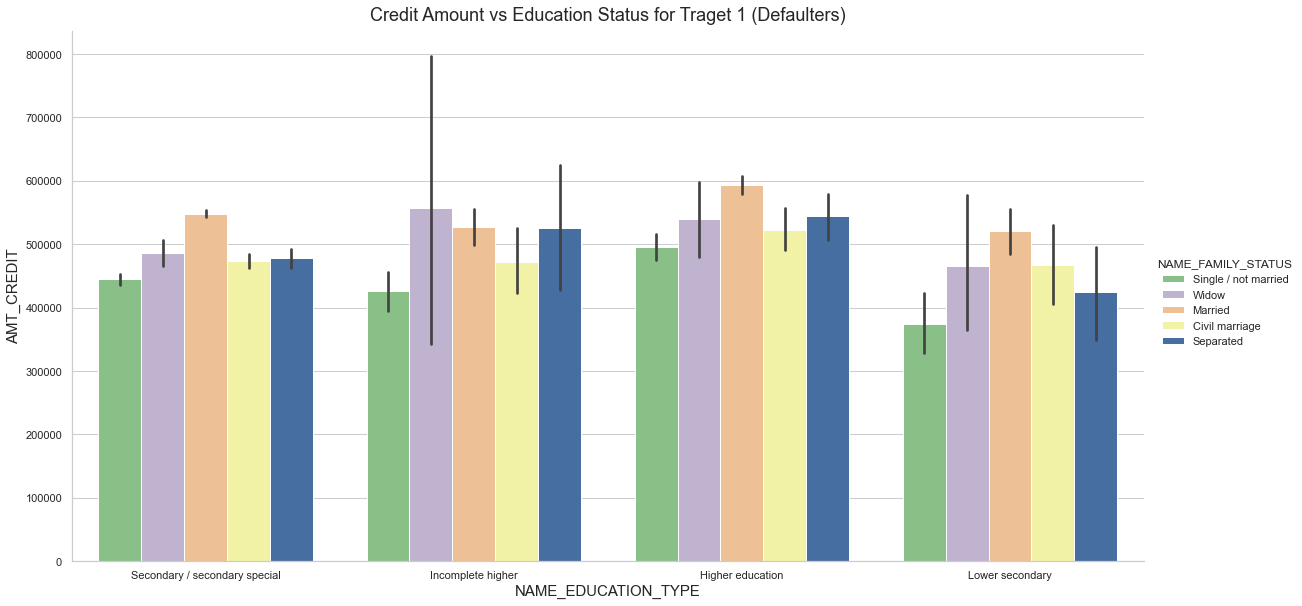

In [70]:
# ploting NAME_EDUCATION_TYPE vs AMT_CREDIT for each family status for target 1

sns.catplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=8,aspect=2, kind="bar", palette="Accent")
plt.title('Credit Amount vs Education Status for Traget 1 (Defaulters)');

##### Inference:

Points to be concluded from the above graph for target = 1 (Defaulters):-

- One very important difference we see from the previous graph is that there's no Academic Degree holders among Defaulters.
- Accross all education segment married customer tends to have higher credit amount.
- Customers holding lower eductation tends to have a lower credit amount but among them married ones take higher credits.

### Analysing of Income Amount wrt. Education Status

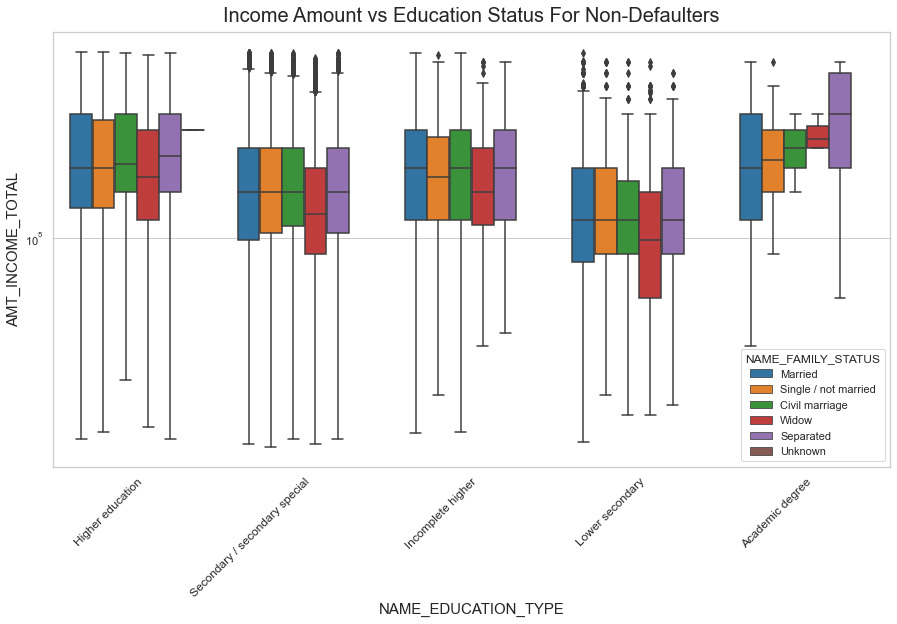

In [71]:
# Box plotting for Income amount vs Education Status for Target 0 in logarithmic scale

import textwrap
plt.figure(figsize=(15,8))
plt.xticks(rotation=45,ha="right",rotation_mode="anchor",fontsize=12)
plt.yscale('log')
g1=sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income Amount vs Education Status For Non-Defaulters',fontsize=20)
plt.show()

##### Inference:

Points to be concluded from the above graph for target = 0 (Non-Defaulters):-

- For Education type 'Lower secondary' and 'Secondary/secondary special', the median income amount is almost same across family status except for widows whose income is significantly lower in the group. 
- For Higher Education and Academic degree holders, there is almost no outliers.
- Academic degree holders have highest income followed by Higher education.
- Lower secondary education type has the lowest income; and among them widows are the lowest.

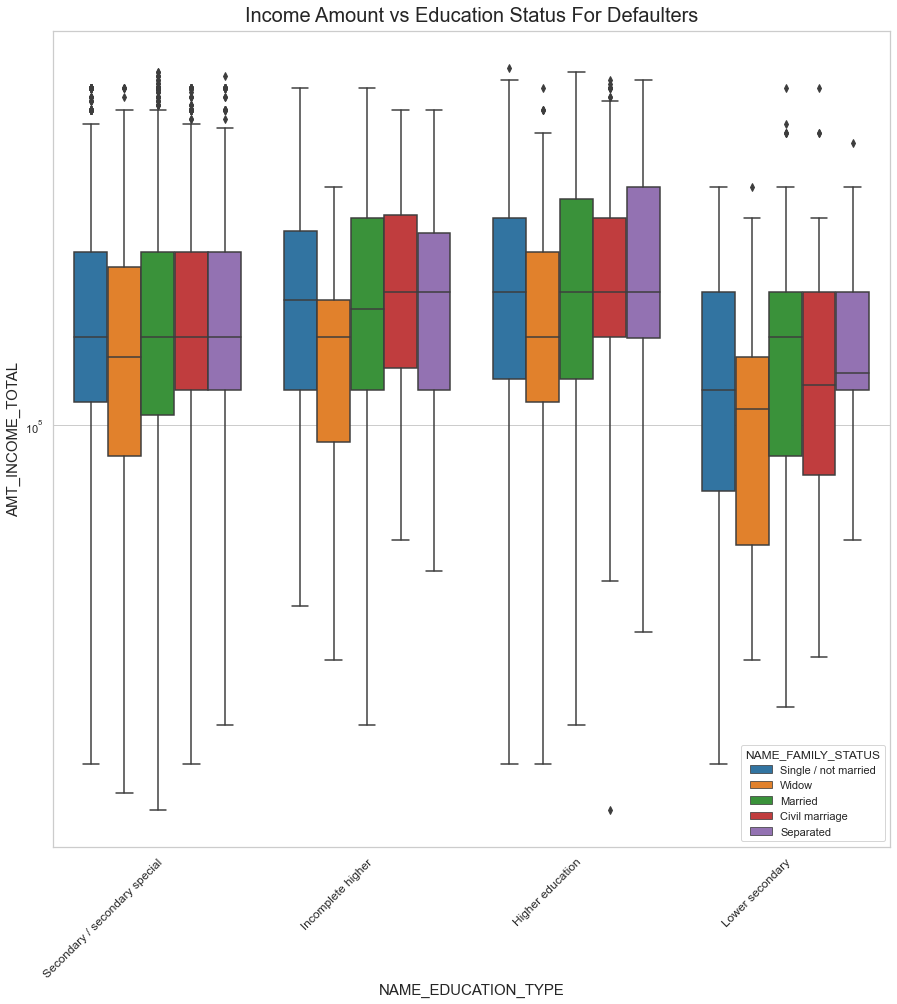

In [72]:
# Box plotting for Income amount vs Education Status for Target 1 in logarithmic scale

plt.figure(figsize=(15,15))
plt.xticks(rotation=45,ha="right",rotation_mode="anchor",fontsize=12)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income Amount vs Education Status For Defaulters',fontsize=20)
plt.show()

##### Inference:

Points to be concluded from the above graph for target = 1 (Defaulters):-

- Comparing with previous graph, we clearly notice that there is no Academic Degree holders among Defaulters.
- Among Defaulters, Higher education and Incomplete Higher education have very similar income pattern.
- We don't see a very strong difference in the income of defaulter except for Lower seconday education type which is on the lower side.

##  Loading Previous Application Data

In [73]:
# Read the dataset of "previous_application_data" in preapp_data dataframe and looking at first five rows
preapp_data=pd.read_csv('previous_application.csv')
preapp_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
#check shape of the dataframe
preapp_data.shape

(1670214, 37)

In [75]:
#check info of the dataframe
preapp_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Treating the Null Values

In [76]:
# checking percentage of null values in each column
preapp_data.isnull().sum()/len(preapp_data) * 100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [77]:
# listing the columns having more than 30% null values and checking their count

emptycol1 = preapp_data.isnull().sum()/len(app_data)
emptycol1 = list(emptycol1[emptycol1.values>0.3].index)

preapp_data.drop(labels=emptycol1, axis=1, inplace=True)

In [78]:
preapp_data.shape

(1670214, 23)

In [79]:
# Removing the column values of 'XNA' and 'XAP'

preapp_data = preapp_data.drop(preapp_data[preapp_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
preapp_data = preapp_data.drop(preapp_data[preapp_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
preapp_data.shape

(69635, 23)

In [80]:
# Merging the Application dataset with previous appliaction dataset
Merged_data = pd.merge(left=app_data, right=preapp_data, how='inner', on='SK_ID_CURR', suffixes='_x')
Merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_APPLICATION,AMT_CREDITx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,Laborers,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,"75000,100000",150000-200000,1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,275000-300000,650000-700000,1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action,Cash Street: low
2,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,Managers,2.0,2,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,175000-200000,500000-550000,1223113,Cash loans,337500.0,407911.5,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,Managers,2.0,2,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,175000-200000,500000-550000,1529558,Cash loans,450000.0,555723.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low
4,100053,0,Cash loans,F,N,Y,0,202500.0,305221.5,17649.0,252000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.019689,-20373,365243,-7760.0,-1993,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,200000-225000,300000-350000,2572058,Cash loans,90000.0,121968.0,WEDNESDAY,7,Y,1,Other,Approved,-649,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


In [81]:
Merged_data.shape

(52714, 57)

In [82]:
# Renaming the column names after merging
Merged_data = Merged_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [83]:
# Removing unwanted columns for analysis
Merged_data.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [84]:
#check shape of the Merged Data
Merged_data.shape

(52714, 44)

### Univariate Analysis

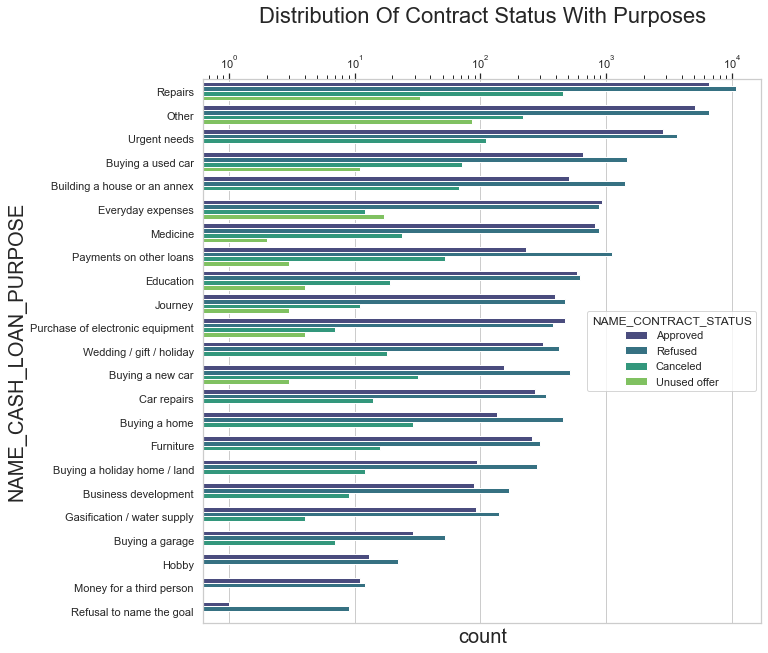

In [85]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('notebook')

plt.figure(figsize=(10,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.title('Distribution Of Contract Status With Purposes')
plt.xscale('log')

ax = sns.countplot(data = Merged_data, y= 'NAME_CASH_LOAN_PURPOSE',orient="h",
                   order=Merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue= 'NAME_CONTRACT_STATUS',palette='viridis') 
ax.xaxis.tick_top()

##### Inference:

We can conclude the below points from the graph:-

- Most rejection of loans came from purpose 'Repairs'.
- We have almost equal number of approves and rejection for Medicine, Every day expenses and education purposes.

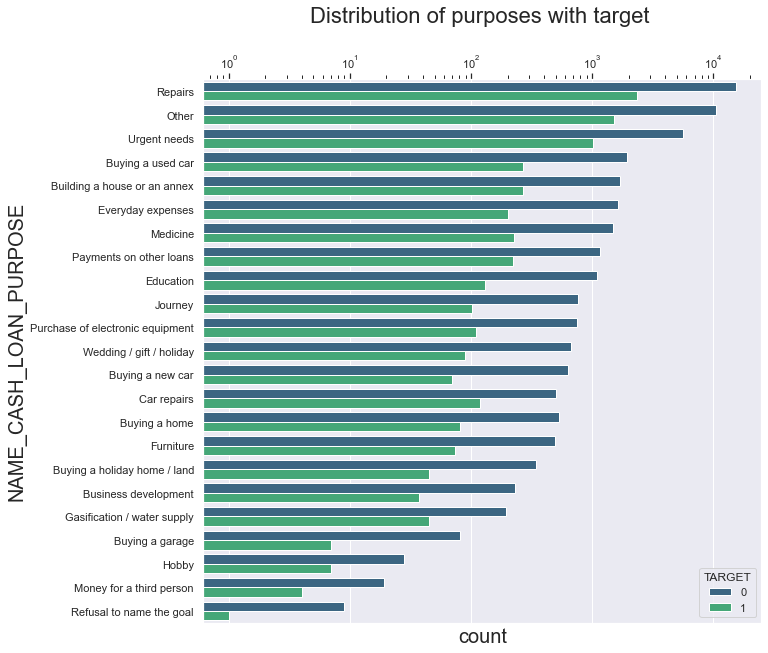

In [86]:
# Distribution of purposes with target

sns.set_style('darkgrid')
sns.set_context('notebook')

plt.figure(figsize=(10,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = Merged_data, y= 'NAME_CASH_LOAN_PURPOSE',orient="v",
                   order=Merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue= 'TARGET',palette='viridis') 
ax.xaxis.tick_top()

##### Inference:

- we can conclude from above plot that Loan purposes with 'Repairs', 'Urgent need' and 'Others' are facing more difficulites in payment on time.

## Bivariate Analysis

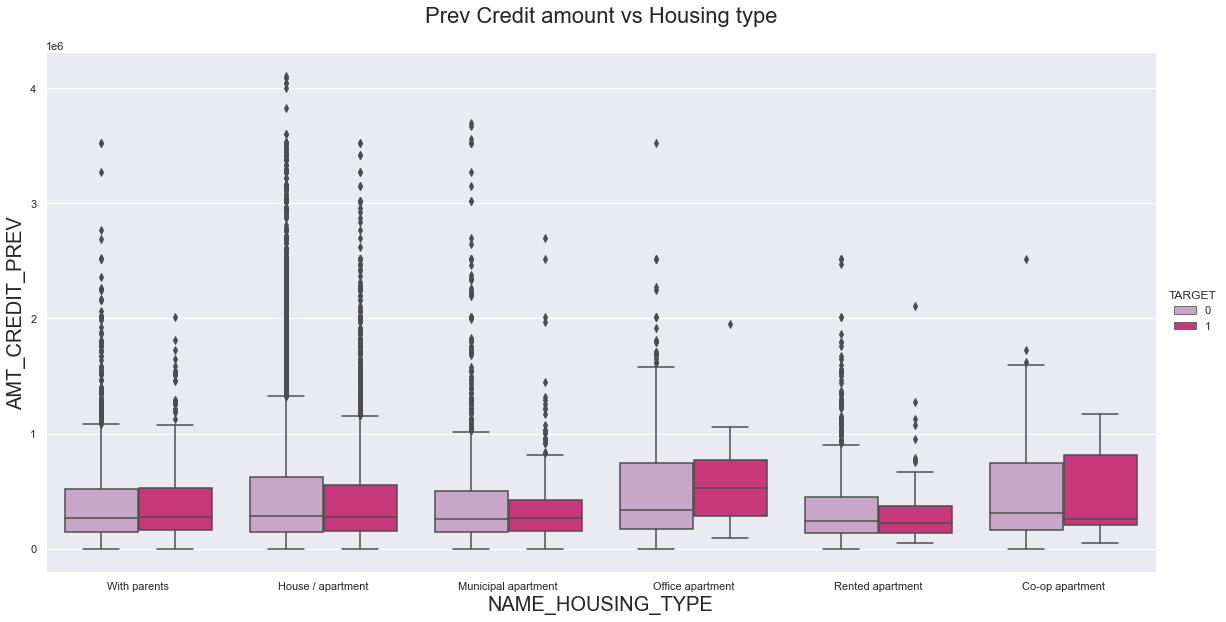

In [87]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

sns.catplot(x="NAME_HOUSING_TYPE", y="AMT_CREDIT_PREV", hue="TARGET", data=Merged_data, kind="box", height=8,aspect=2,palette='PuRd')
plt.title('Prev Credit amount vs Housing type');

#### Inference:

- Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or muncipal appartment for successful payments.

### Previous loan Status Vs Current Defaulters Plot

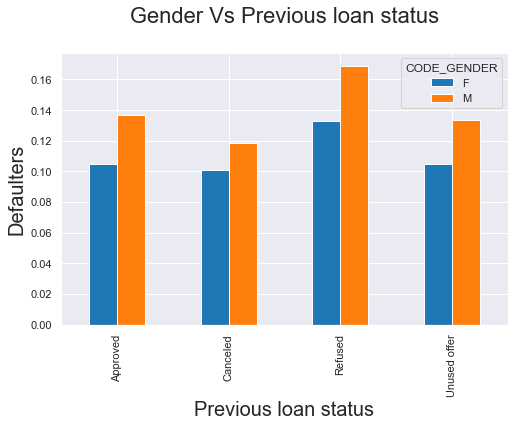

In [88]:
Merged_data.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Gender Vs Previous loan status')
plt.show()

##### Inference:

- Male clients are more defaulted than female client. Also, previously refused customer are more defaulted in current application.

### Client Type Vs Previous loan status plot

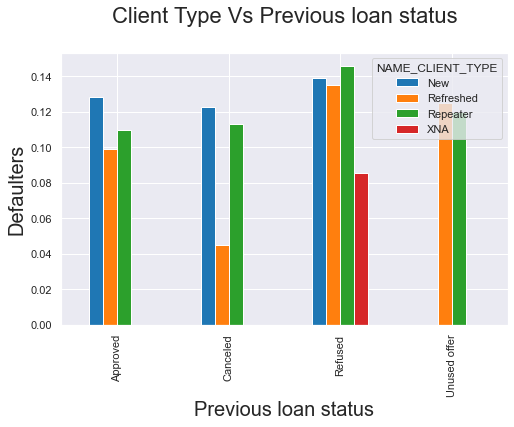

In [89]:
Merged_data.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Client Type Vs Previous loan status')
plt.show()

##### Inference:

- Previously refused New, refreshed and repeater clients have defaulted more.

### Family Status Vs Previous loan status plot

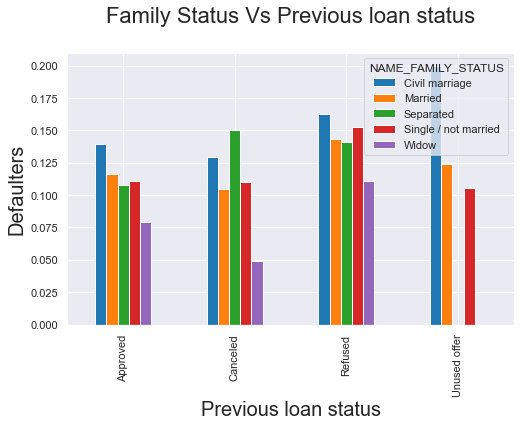

In [90]:
Merged_data.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_FAMILY_STATUS',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Family Status Vs Previous loan status')
plt.show()

##### Inference:

- Client who did civil marriage with previously unused loan offers ar more defaulted currently.

### Educatuion status Vs Previous loan status plot

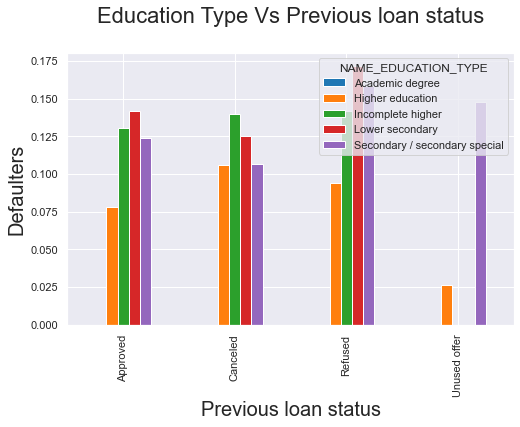

In [91]:
Merged_data.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_EDUCATION_TYPE',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Education Type Vs Previous loan status')
plt.show()

##### Inference:

- Previously refused people with lower secondary education and secondary/secondary special are more defaulted in current application.